## Import Library

In [21]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Cell code di atas merupakan bagaian "Import Library" yang berisi proses import pustaka-pustaka yang akan digunakan dalam menjalankan kode program. Pustaka-pustaka yang di-import di antaranya, yaitu:
- Pustaka "matplotlib.pyplot" digunakan untuk proses mambaca dan menampilkan gambar, serta visualisasi data, yang dialiaskan sebagai "plt".
- Pustaka "cv2" digunakan untuk membaca, menampilkan, dan memanipulasi gambar, yang dialiaskan sebagai "cv".
- Pustaka "numpy" digunakan untuk operasi numerik dan pembuatan array numpy, yang dialiaskan sebagai "np".
- Pustaka "os" digunakan untuk operasi sistem seperti membaca file dan memnyimpan/membuat direktori file.
- Pustaka "random" digunakan untuk operasi acak, yang berguna dalam proses visualisasi sample gambar.
- Pustaka "pandas" digunakan untuk manipulasi data dan pembuatan DataFrame untuk data hasil ekstraksi.
- Pustaka "seaborn" digunakan untuk visualisasi data, seperti menampilkan diagram heatmap hasil evaluasi model.
- Pustaka "sklearn" digunakan untuk proses modelling dan evaluasi.
- "train_test_split" digunakan untuk membagi dataset menjadi subset data pelatihan dan data pengujian.
- "sklearn.neighbors import KNeighborsClassifier" digunakan untuk proses klasifikasi dengan mencari sejumlah k tetangga terdekat dari sampel baru dan kemudian memprediksi label berdasarkan mayoritas tetangga tersebut.
- "from sklearn.svm import SVC" digunakan untuk proses klasifikasi dengan mengimplementasikan Support Vector Classification (SVM) yang mencari hyperplane terbaik yang memisahkan kelas-kelas dalam data dengan margin maksimum.
- "from sklearn.ensemble import RandomForestClassifier" digunakan untuk proses klasifikasi dengan  metode ensemble yang membangun sejumlah besar pohon keputusan dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.
- "precision_score, recall_score, f1_score, confusion_matrix" dalah fungsi dari sklearn.metrics yang menghitung akurasi klasifikasi, presisi klasifikasi, recall (sensitivitas) klasifikasi, F1 score yaitu rata-rata harmonis dari presisi dan recall.

## Data Loading

In [22]:
folders = [
    "dataset/black_rot/",
    "dataset/esca_black_measles/",
    "dataset/healthy/"
]
data = []
labels = []
file_name = []
for folder in folders:
    label = folder.split('_')[-1]
    dataset = os.listdir(folder)
    for file in dataset:
        image_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        resized_img = cv.resize(temp, (300, 300), interpolation=cv.INTER_NEAREST)
        data.append(resized_img)
        labels.append(label)
        file_name.append(name)

Cell code di atas bertujuan untuk membaca gambar dari ketiga subfolder yang berbeda, dan melakukan pra-pemrosesan pada gambar-gambar tersebut, dan menyimpan data gambar serta label yang sesuai ke dalam list. Deklarasi "folders" merupakan suatu list yang berisi path dari masing-masing folder gambar. Deklarasi "data" merupakan list kosong yang akan diisi dengan gambar-gambar yang telah diproses. Deklarasi "labels" merupakan suatu list kosong yang akan diisi dengan label dari masing-masing gambar. Deklarasi "file_name" merupakan list kosong yang akan diisi dengan nama file dari masing-masing gambar. Selanjutnya yaitu melakukan inisialisasi label dan data gambar ke dalam list dengan menggunakan looping melalui setiap folder di dalam "folders". Untuk nama label yang diambil adalah bagian terakhir setelah karakter "_". Kemudian dilakukan pembacaan gambar di dalam folder dengan menggunakan os.listdir(folder), yang mengembalikan list nama file dalam folder tersebut. Pada saat looping untuk membaca setiap gambar dilakukan proses untuk membuat path serta nama file dari setiap gambar yang dilalui kemudian gambar dibaca dengan "cv.imread" dan di-resize dengan "cv.resize" menggunakan library "cv" menjadi ukuran 300x300. Setiap data gambar, label, dan nama file yang telah didapatkan di setiap iterasi akan dimasukkan ke dalam list dengan "append".

Cell code di bawah bertujuan untuk menghitung jumlah gambar dalam setiap subfolder yang berbeda, dan memvisualisasikan distribusi data tersebut dalam bentuk grafik batang, dan menampilkan jumlah gambar dalam setiap subfolder. Deklarasi count_data merupakan suatu dictionary kosong yang akan diisi dengan jumlah gambar dari masing-masing folder. Dilakukan looping melalui setiap folder di dalam "folders", dan setiap nama folder dijadikan kunci (key) dalam "count_data" serta nilai (value)-nya adalah jumlah gambar dalam folder tersebut yang dihitung menggunakan "len(os.listdir(folder))". Setelah itu, "plt.bar" digunakan untuk membuat grafik batang dengan kunci "count_data" sebagai label sumbu-x dan nilai count_data sebagai tinggi batang. Deklarasi "plt.title('Visualisasi Distribusi Data')" memberikan judul pada grafik. Deklarasi "plt.show()" digunakan untuk menampilkan grafik. Terakhir, "count_data.values()" digunakan untuk menampilkan jumlah gambar dalam setiap subfolder sebagai output.

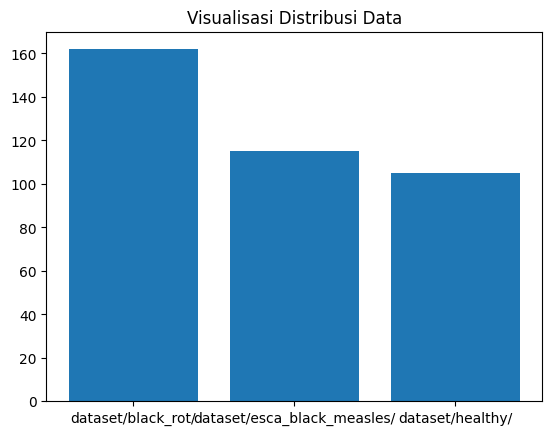

dict_values([162, 115, 105])

In [23]:
count_data = {}
for folder in folders:
    count_data[folder] = len(os.listdir(folder))

plt.bar(count_data.keys(), count_data.values())
plt.title('Visualisasi Distribusi Data')
plt.show()
count_data.values()

In [36]:
def plot_samples(data, labels, num_samples=5):
    unique_labels = np.unique(labels)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*3, len(unique_labels)*3))
    for i, label in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(labels) if l == label]
        sample_indices = random.sample(indices, num_samples)
        for j, sample_idx in enumerate(sample_indices):
            axes[i, j].imshow(data[sample_idx], cmap='gray')
            axes[i, j].axis('off')
            if j == 2:
                axes[i, j].set_title(f'Label: {label}')

    plt.tight_layout()
    plt.show()

Cell code di atas merupakan deklarasi fungsi dengan nama "plot_samples" dengan tiga parameter berupa "data", "labels", dan "num_samples" yang di-set defaultnya dengan "5". Fungsi "plot_samples" ini bertujuan untuk menampilkan beberapa sampel gambar dari setiap kategori label. Fungsi ini membantu dalam visualisasi data untuk mendapatkan gambaran mengenai distribusi dan variasi gambar dalam dataset. "unique_labels = np.unique(labels)" menggunakan "np.unique" untuk mendapatkan list label unik dari labels. Kemudian dibuat grid "subplot" dengan jumlah baris sesuai dengan jumlah label unik dan jumlah kolom sesuai dengan "num_samples". Ukuran figur disesuaikan agar setiap subplot berukuran 3x3 inci. Perulangan dilakukan pada setiap label unik untuk membuat list indeks dari gambar-gambar yang memiliki label yang sesuai dan memilih secara acak "num_samples" indeks dari list "indices" menggunakan fungsi "random".
Setelah itu, dilakukan looping untuk setiap indeks sampel yang dipilih untuk menampilkan gambar di subplot yang sesuai. "cmap='gray'" digunakan untuk menampilkan gambar dalam skala abu-abu. Akan ditambahkan judul pada kolom ke 2 (tengah) dari setiap baris subplot dengan label yang sesuai.

Cell code di bawah digunakan untuk menampilkan sampel gambar dengan memanggil fungsi "plot_samples" dengan memasukkan argument berupa list "data" dan list "labels" yang akan diproses.

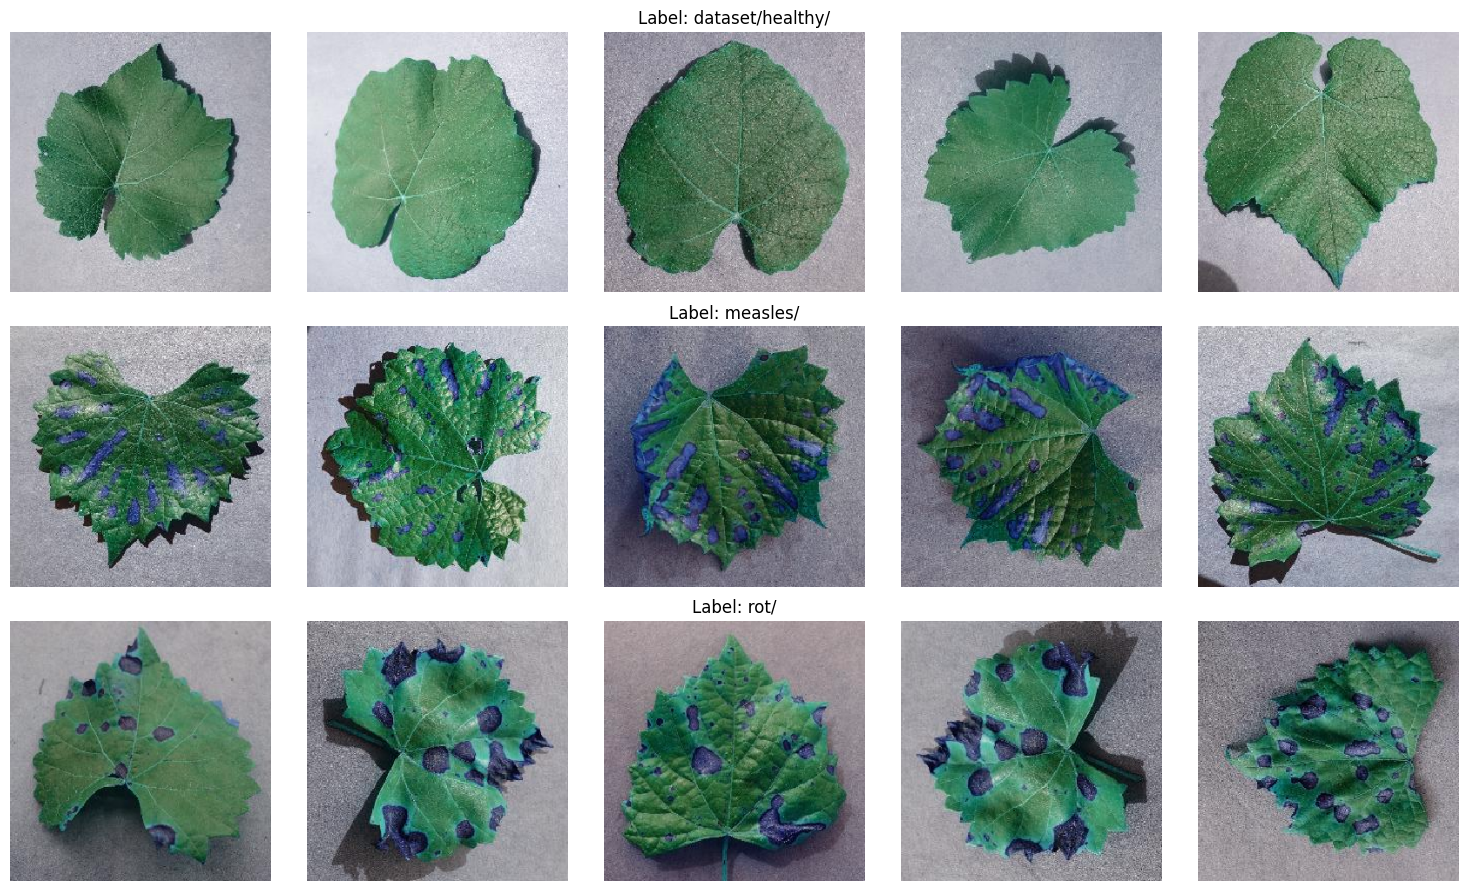

In [37]:
plot_samples(data, labels)

In [26]:
def is_index_valid(arr, i, j):
    return 0<=i<len(arr) and 0<=j<len(arr[0])

def norm_degree(image):
    sum = np.sum(image)
    return image/sum

def derajat0(image):
    result = np.zeros((256, 256))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image, i, j+1):
                result[image[i,j], image[i, j+1]] += 1
    result = result+result.T
    result = norm_degree(result)
    return result

def derajat90(image):
    result = np.zeros((256, 256))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image, i-1, j):
                result[image[i,j], image[i-1, j]] += 1
    result = result+result.T
    result = norm_degree(result)
    return result

def derajat45(image):
    result = np.zeros((256, 256))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image, i-1, j+1):
                result[image[i,j], image[i-1, j+1]] += 1
    result = result+result.T
    result = norm_degree(result)
    return result

def derajat135(image):
    result = np.zeros((256, 256))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image, i-1, j-1):
                result[image[i,j], image[i-1, j-1]] += 1
    result = result+result.T
    result = norm_degree(result)
    return result

Cell code di atas merupakan deklarasi beberapa fungsi yang digunakan untuk melakukan operasi pada gambar dan matriks untuk melakukan ekstraksi GLCM. Berikut adalah penjelasan untuk masing-masing fungsi:
- Deklarasi fungsi "is_index_valid" dengan dua parameter, yaitu "arr" dan "i", "j" Fungsi ini bertujuan untuk memeriksa apakah indeks "i" dan "j" valid dalam array dua dimensi "arr". Fungsi mengembalikan "True" jika indeks valid, yaitu jika "i" berada dalam rentang baris dan "j" berada dalam rentang kolom dari array "arr", dan "False" jika tidak.
- Deklarasi fungsi "norm_degree" dengan satu parameter berupa "image". Fungsi ini bertujuan untuk menormalisasi matriks image dengan menjumlahkan semua elemen dalam matriks dan membagi setiap elemen dengan jumlah tersebut. Fungsi ini mengembalikan matriks yang dinormalisasi.
- Deklarasi fungsi "derajat0" dengan satu parameter berupa "image". Fungsi ini bertujuan untuk menghitung matriks derajat co-occurrence pada sudut 0 derajat. Matriks hasil disimpan dalam "result" dan dihitung dengan menambahkan nilai "1" pada posisi yang sesuai dalam matriks untuk setiap pasangan piksel yang bersebelahan secara horizontal. Matriks hasil ditambahkan dengan transpose-nya sendiri dan kemudian dinormalisasi menggunakan fungsi "norm_degree".
- Deklarasi fungsi "derajat90" dengan satu parameter berupa "image". Fungsi ini bertujuan untuk menghitung matriks derajat co-occurrence pada sudut 90 derajat. Matriks hasil disimpan dalam "result" dan dihitung dengan menambahkan nilai "1" pada posisi yang sesuai dalam matriks untuk setiap pasangan piksel yang bersebelahan secara vertikal. Matriks hasil ditambahkan dengan transpose-nya sendiri dan kemudian dinormalisasi menggunakan fungsi "norm_degree".
- Deklarasi fungsi "derajat45" dengan satu parameter berupa "image". Fungsi ini bertujuan untuk menghitung matriks derajat co-occurrence pada sudut 45 derajat. Matriks hasil disimpan dalam result dan dihitung dengan menambahkan nilai "1" pada posisi yang sesuai dalam matriks untuk setiap pasangan piksel yang bersebelahan secara diagonal ke kanan atas. Matriks hasil ditambahkan dengan transpose-nya sendiri dan kemudian dinormalisasi menggunakan fungsi "norm_degree".
- Deklarasi fungsi "derajat135" dengan satu parameter berupa "image". Fungsi ini bertujuan untuk menghitung matriks derajat co-occurrence pada sudut 135 derajat. Matriks hasil disimpan dalam result dan dihitung dengan menambahkan nilai "1" pada posisi yang sesuai dalam matriks untuk setiap pasangan piksel yang bersebelahan secara diagonal ke kiri atas. Matriks hasil ditambahkan dengan transpose-nya sendiri dan kemudian dinormalisasi menggunakan fungsi "norm_degree".

In [27]:
def contrast(matriks):
    result = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            result += (i-j)**2 * matriks[i, j]
    return result

def dissimilarity(matriks):
    result = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            result += abs(i-j) * matriks[i, j]
    return result

def homogenity(matriks):
    result = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            result += matriks[i, j] / (1 + abs(i-j))
    return result

def entropy(matriks):
    result = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            if matriks[i, j] != 0:
                result -= matriks[i, j] * np.log2(matriks[i, j])
    return result

def asm(matriks):
    result = np.sum(matriks**2)
    return result

def energy(matriks):
    result = np.sqrt(np.sum(matriks**2))
    return result

def idxMiu(matriks):
    row, col = matriks.shape
    indices_i, indices_j = np.indices((row, col))
    miu_i = np.sum(indices_i * matriks)
    miu_j = np.sum(indices_j * matriks)
    return miu_i, miu_j

def standartDeviation(matriks):
    row, col = matriks.shape
    indices_i, indices_j = np.indices((row, col))
    miu_i, miu_j = idxMiu(matriks)
    standartDev_i = np.sqrt(np.sum((indices_i - miu_i)**2 * matriks))
    standartDev_j = np.sqrt(np.sum((indices_j - miu_j)**2 * matriks))
    return standartDev_i, standartDev_j

def correlation(matriks):
    row, col = matriks.shape
    indices_i, indices_j = np.indices((row, col))
    miu_i, miu_j = idxMiu(matriks)
    standartDev_i, standartDev_j = standartDeviation(matriks)
    result = np.sum((indices_i - miu_i) * (indices_j - miu_j) * matriks) / (standartDev_i * standartDev_j)
    return result

Cell code di atas merupakan deklarasi beberapa fungsi untuk menghitung berbagai fitur tekstur dari suatu matriks, yang akan digunakan dalam analisis GLCM. Setiap fungsi memiliki tujuan spesifik untuk menghitung metrik tertentu yang membantu dalam memahami sifat tekstur dari gambar. Fungsi "contrast" bertujuan untuk menghitung kontras dari suatu matriks dengan "result += (i-j)**2 * matriks[i, j]". Kontras adalah ukuran perbedaan intensitas atau kecerahan antara piksel bersebelahan dalam gambar. Semakin tinggi kontras, semakin besar perbedaan intensitas antar piksel. Fungsi "dissimilarity" bertujuan untuk menghitung dissimilaritas dari suatu matriks dengan "result += abs(i-j) * matriks[i, j]". Dissimilaritas mengukur perbedaan absolut antara pasangan piksel dalam gambar. Fungsi "homogenity" bertujuan untuk menghitung homogenitas dari suatu matriks dengan "result += matriks[i, j] / (1 + abs(i-j))". Homogenitas mengukur seberapa mirip nilai piksel dalam gambar. Semakin tinggi homogenitas, semakin sedikit variasi dalam intensitas piksel. Fungsi "entropy" bertujuan untuk menghitung entropi dari suatu matriks dengan "result -= matriks[i, j] * np.log2(matriks[i, j])". Entropi mengukur kekacauan atau ketidakpastian dalam gambar. Semakin tinggi entropi, semakin kompleks atau tidak teratur tekstur dalam gambar. Fungsi "asm" (Angular Second Moment) bertujuan untuk menghitung ASM dari suatu matriks dengan "result = np.sum(matriks ** 2)". ASM juga dikenal sebagai energi, dan mengukur homogenitas suatu gambar. Nilai ASM yang lebih tinggi menunjukkan tekstur yang lebih homogen. Fungsi "energy" bertujuan untuk menghitung energi dari suatu matriks dengan " result = np.sqrt(np.sum(matriks ** 2))". Energi adalah akar kuadrat dari ASM, dan juga mengukur homogenitas gambar. Fungsi "idxMiu" bertujuan untuk menghitung mean indeks baris ("miu_i") dan mean indeks kolom ("miu_j") dari suatu matriks. Mean indeks ini digunakan untuk menghitung standar deviasi dan korelasi. Fungsi "standartDeviation" bertujuan untuk menghitung standar deviasi dari indeks baris ("standartDev_i") dan indeks kolom ("standartDev_j"). Standar deviasi mengukur seberapa jauh nilai piksel menyebar dari mean. Terakhir adalah fungsi "correlation" bertujuan untuk menghitung korelasi dari suatu matriks. Korelasi mengukur seberapa suatu piksel pada gambar terkait dengan piksel lain. Korelasi yang tinggi menunjukkan hubungan yang kuat antara pasangan piksel.

In [28]:
def extract_glcm_features(image):
    glcm_0 = derajat0(image)
    glcm_45 = derajat45(image)
    glcm_90 = derajat90(image)
    glcm_135 = derajat135(image)
    
    features = []
    
    for glcm in [glcm_0, glcm_45, glcm_90, glcm_135]:
        features.append(contrast(glcm))
        features.append(dissimilarity(glcm))
        features.append(homogenity(glcm))
        features.append(entropy(glcm))
        features.append(asm(glcm))
        features.append(energy(glcm))
        features.append(correlation(glcm))
    
    return features

Cell code di atas merupakan deklarasi fungsi dengan nama "extract_glcm_features" yang menerima satu parameter berupa "image". Fungsi "extract_glcm_features" bertujuan untuk mengekstraksi fitur-fitur dari gambar menggunakan Gray Level Co-occurrence Matrix (GLCM) pada berbagai derajat orientasi dengan memanggil fungsi untuk derajat yang sesuai. "features = []:" merupakan list kosong untuk menyimpan fitur-fitur yang akan diekstraksi dari GLCM. Kemudian melakukan looping untuk setiap GLCM yang telah dihitung pada berbagai orientasi, dan berbagai fitur dihitung dari masing-masing GLCM dan ditambahkan ke dalam list features dengan fungsi "append". Setelah iterasi berakhir, fungsi ini akan mengembalikan list "features" yang berisi fitur-fitur yang telah diekstraksi dari berbagai GLCM.
Ringkasan.

In [29]:
glcm_features = []
for image in data:
    glcm_features.append(extract_glcm_features(image))

glcm_df = pd.DataFrame(glcm_features, columns=[
    'contrast_0', 'dissimilarity_0', 'homogenity_0', 'entropy_0', 'asm_0', 'energy_0', 'correlation_0',
    'contrast_45', 'dissimilarity_45', 'homogenity_45', 'entropy_45', 'asm_45', 'energy_45', 'correlation_45',
    'contrast_90', 'dissimilarity_90', 'homogenity_90', 'entropy_90', 'asm_90', 'energy_90', 'correlation_90',
    'contrast_135', 'dissimilarity_135', 'homogenity_135', 'entropy_135', 'asm_135', 'energy_135', 'correlation_135'
])

glcm_df['label'] = labels

glcm_df.to_csv('feature_extraction_beforee.csv', index=False)

Cell code di atas bertujuan untuk mengekstrak fitur GLCM (Gray Level Co-occurrence Matrix) dari setiap gambar dalam list "data", dan menyimpan hasilnya ke dalam "DataFrame". Fitur-fitur GLCM ini kemudian disimpan dalam file CSV. "glcm_features = []:" merupakan list kosong yang akan diisi dengan fitur-fitur GLCM dari setiap gambar. Kemudian melakukan looping pada setiap gambar dalam list "data" dan memanggil fungsi "extract_glcm_features" untuk mengekstrak fitur GLCM dari gambar, dan menambahkan hasilnya ke list glcm_features dengan "append". "pd.DataFrame" digunakan untuk membuat DataFrame "glcm_df" dari list "glcm_features", dengan kolom yang dinamai sesuai fitur GLCM yang diekstrak pada empat sudut (0, 45, 90, dan 135 derajat). Nama kolom diatur untuk masing-masing fitur, yaitu "contrast, dissimilarity, homogenity, entropy, asm, energy, dan correlation". Terakhir adalah menambahkan label dan menyimpan hasil "DataFrame" ke dalam file CSV.

Cell code di bawah digunakan untuk menampilkan DataFrame "glcm_df" yanng telah dihasilkan. DataFrame berisi 232 baris data serta 29 kolom fitur ekstraksi.

In [30]:
glcm_df

,contrast_0,dissimilarity_0,homogenity_0,entropy_0,asm_0,energy_0,correlation_0,contrast_45,dissimilarity_45,homogenity_45,...,energy_90,correlation_90,contrast_135,dissimilarity_135,homogenity_135,entropy_135,asm_135,energy_135,correlation_135,label
0,491.419887,14.367211,0.273500,13.514570,0.000222,0.014906,0.920991,598.492284,16.968460,0.162234,...,0.015244,0.926561,637.790710,17.499082,0.159201,14.004217,0.000091,0.009562,0.897478,rot/
1,229.193578,10.008707,0.298963,12.929014,0.000285,0.016891,0.946630,302.357827,12.464446,0.183871,...,0.017304,0.955367,284.672808,12.114403,0.187401,13.357957,0.000132,0.011473,0.933741,rot/
2,175.683234,8.358987,0.334659,12.511686,0.000416,0.020395,0.955371,251.363561,10.987872,0.210325,...,0.019954,0.957807,226.381407,10.393168,0.217137,12.984856,0.000202,0.014197,0.942546,rot/
3,147.217635,7.659391,0.339641,12.469820,0.000370,0.019237,0.968658,213.547039,10.199443,0.213838,...,0.018773,0.968240,202.186348,9.983490,0.216613,12.985259,0.000179,0.013369,0.956951,rot/
4,148.128502,7.681162,0.339772,12.474797,0.000369,0.019209,0.968273,215.188548,10.241561,0.213171,...,0.018646,0.967837,203.890420,10.026983,0.216125,12.993329,0.000177,0.013307,0.956325,rot/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,168.250129,7.749017,0.352806,12.239670,0.000634,0.025171,0.960071,236.029064,9.888447,0.233555,...,0.024962,0.962518,219.995550,9.702543,0.234508,12.711882,0.000323,0.017983,0.947856,dataset/healthy/
378,171.282806,7.331753,0.365845,12.218749,0.000539,0.023215,0.953678,214.767553,9.177866,0.245457,...,0.022762,0.960294,232.365662,9.448546,0.243884,12.735082,0.000270,0.016445,0.937127,dataset/healthy/
379,172.008591,7.350605,0.366283,12.215191,0.000551,0.023472,0.953578,214.741955,9.175546,0.246292,...,0.022924,0.960608,232.334471,9.447506,0.244420,12.730169,0.000274,0.016567,0.937259,dataset/healthy/
380,171.611769,7.344471,0.366305,12.214778,0.000550,0.023457,0.953594,231.971248,9.442556,0.244373,...,0.022861,0.960508,214.368642,9.170441,0.246246,12.697186,0.000277,0.016639,0.941994,dataset/healthy/


In [31]:
X = glcm_df.drop(columns=['label'])
y = glcm_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cell code di atas bertujuan untuk mempersiapkan data yang akan digunakan dalam proses pelatihan dan pengujian model klasifikasi yang dibuat. Deklarasi "X = glcm_df.drop(columns=['label'])" merupakan perintah untuk memisahkan fitur dari dataset dengan menghapus kolom "label" dari "glcm_df". Deklarasi "y = glcm_df['label']" digunakan untuk menyimpan kolom "label" ke dalam variabel "y", yang berisi label dari masing-masing sampel. Selanjutnya, dilakukan pembagian dataset menjadi subset pelatihan dan pengujian menggunakan "train_test_split" dari "sklearn.model_selection". Deklarasi "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)" membagi data fitur "X" dan label "y" ke dalam data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test). "test_size=0.2" menunjukkan bahwa 20% (8:2) dari data akan digunakan sebagai data pengujian, dan "random_state=42" digunakan untuk memastikan bahwa pembagian data konsisten di setiap eksekusi.

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Cell code di atas merupakan deklarasi untuk menormalisasikan fitur dalam dataset pelatihan dan pengujian menggunakan "StandardScaler". Proses ini penting untuk memastikan bahwa setiap fitur memiliki skala yang sama, yang dapat meningkatkan kinerja model. "fit_transform" menggabungkan dua langkah (fit dan transform) dalam satu baris kode, dan hasilnya adalah "X_train_scaled" dan "X_test_scaled", yaitu data pelatihan  dan pengujian yang telah distandarisasi.

In [33]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

Cell code di atas bertujuan untuk melatih dan memprediksi data menggunakan tiga model klasifikasi yang berbeda: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), dan Random Forest. Setiap model dilatih menggunakan data pelatihan yang telah diskalakan, dan prediksi dilakukan pada data pengujian yang juga telah diskalakan. Hasil prediksi kemudian disimpan dalam variabel yang sesuai.
- Deklarasi "knn = KNeighborsClassifier(n_neighbors=5)" merupakan inisialisasi model KNN dengan parameter "n_neighbors" yang di-set dengan nilai "5". Model ini menggunakan algoritma KNN yang bekerja dengan mencari lima tetangga terdekat untuk setiap sampel baru dan memprediksi kelas berdasarkan mayoritas kelas dari tetangga-tetangga tersebut. "knn.fit(X_train_scaled, y_train)" digunakan untuk melatih model KNN menggunakan data pelatihan yang telah diskalakan (X_train_scaled) dan label pelatihan (y_train). "y_pred_knn = knn.predict(X_test_scaled)" digunakan untuk melakukan prediksi pada data pengujian yang telah diskalakan (X_test_scaled) dan menyimpan hasil prediksi ke dalam variabel "y_pred_knn".
- Deklarasi "svm = SVC(kernel='linear', C=1)" merupakan inisialisasi model SVM dengan parameter kernel yang di-set dengan "linear" dan "C" yang di-set dengan nilai "1". Model ini menggunakan SVM dengan kernel linear yang bekerja dengan mencari hyperplane terbaik yang memisahkan kelas-kelas dalam data dengan margin maksimum. "svm.fit(X_train_scaled, y_train)" digunakan untuk melatih model KNN menggunakan data pelatihan yang telah diskalakan (X_train_scaled) dan label pelatihan (y_train). "y_pred_svm = svm.predict(X_test_scaled)" digunakan untuk melakukan prediksi pada data pengujian yang telah diskalakan (X_test_scaled) dan menyimpan hasil prediksi ke dalam variabel "y_pred_svm".
- Deklarasi "rf = RandomForestClassifier(n_estimators=100, random_state=42)" merupakan inisialisasi model Random Forest dengan parameter "n_estimators" yang di-set dengan nilai "100" dan "random_state" yang di-set dengan nilai "42". Model ini menggunakan algoritma Random Forest yang bekerja dengan membangun "100" pohon keputusan dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting. "rf.fit(X_train_scaled, y_train)" digunakan untuk melatih model RF menggunakan data pelatihan yang telah diskalakan (X_train_scaled) dan label pelatihan (y_train). "rf = rf.predict(X_test_scaled)" digunakan untuk melakukan prediksi pada data pengujian yang telah diskalakan (X_test_scaled) dan menyimpan hasil prediksi ke dalam variabel "y_pred_rf".

In [34]:
def evaluate_model(y_test, y_pred, model_name, labels):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    print(f'{model_name} Model')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:')

    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

Cellcode di atas berupa deklarasi fungsi "" dengan parameter berupa "y_test", "y_pred", "model_name", "labels" yang telah didapatkan sebelumnya. Fungsi ini digunakan untuk mengevaluasi kinerja model klasifikasi dengan menggunakan beberapa metrik evaluasi dan menampilkan confusion matrix-nya. "accuracy = accuracy_score(y_test, y_pred)" digunakan utnuk menghitung akurasi model menggunakan "accuracy_score". "precision = precision_score(y_test, y_pred, average='weighted')" digunakan untuk menghitung presisi model menggunakan "precision_score" dengan rata-rata "weighted". "recall = recall_score(y_test, y_pred, average='weighted')" digunakan untuk menghitung recall (sensitivitas) model menggunakan "recall_score" dengan rata-rata "weighted". "f1 = f1_score(y_test, y_pred, average='weighted')" digunakan untuk menghitung F1-score model menggunakan "f1_score" dengan rata-rata "weighted". Kemudian dilakukan perhitungan matriks confusion menggunakan "confusion_matrix" dengan label kelas yang ada. Masing-masing hasil perhitungan akan ditampilkan dengan "print()" dan juga confusion matriks divisualisasikan dengan menggunakan heatmap.


Cell code di bawah berguna untuk melakukan evaluasi dari tiga model klasifikasi yang berbeda menggunakan metrik yang sesuai untuk setiap modelnya dengan memanggil fungsi "evaluate_model" yang telah dideklarasikan sebelumnya. Evaluasi dilakukan dengan membandingkan prediksi ("y_pred_knn", "y_pred_svm", "y_pred_rf") terhadap label sebenarnya ("y_test"). "unique_labels = np.unique(y)" digunakan untuk mendapatkan label unik dari dataset yang digunakan.

KNN Model
Accuracy: 0.8831168831168831
Precision: 0.8963924963924964
Recall: 0.8831168831168831
F1 Score: 0.8793913157549519
Confusion Matrix:


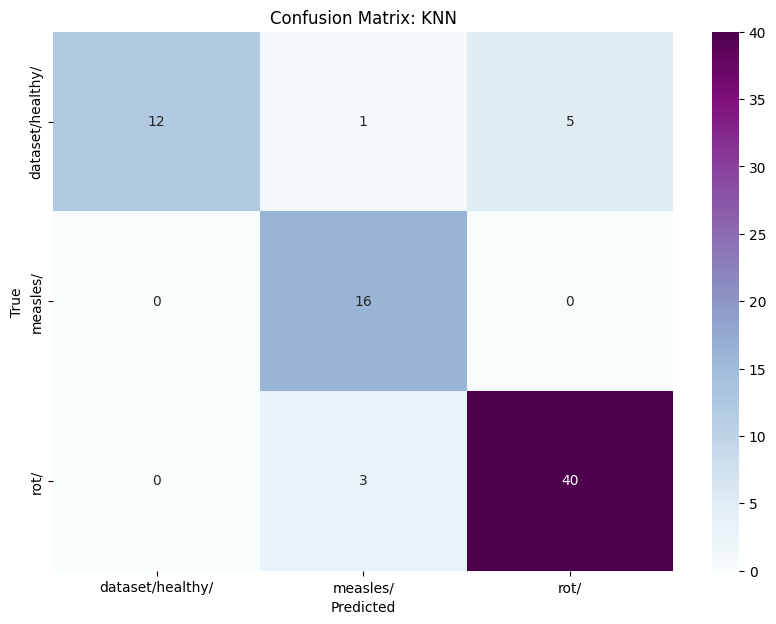

SVM Model
Accuracy: 0.8311688311688312
Precision: 0.8562107748710619
Recall: 0.8311688311688312
F1 Score: 0.8380759498553985
Confusion Matrix:


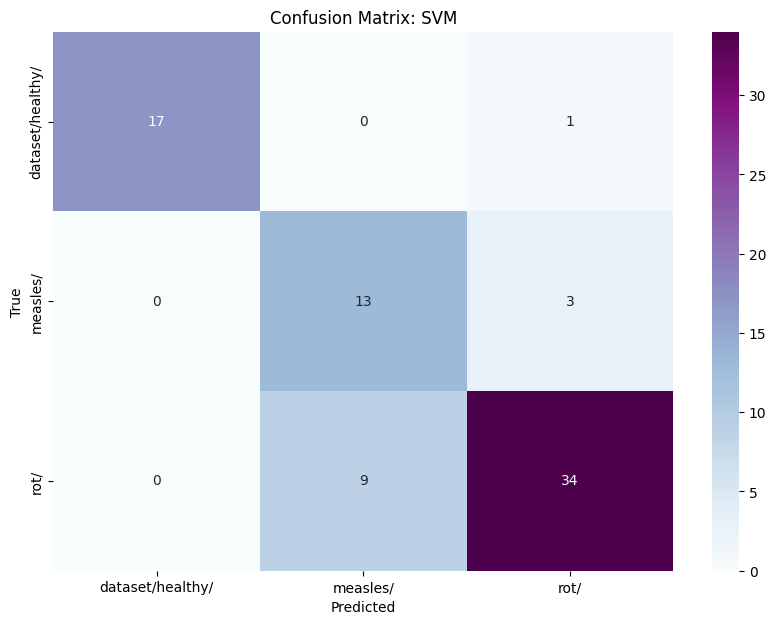

Random Forest Model
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:


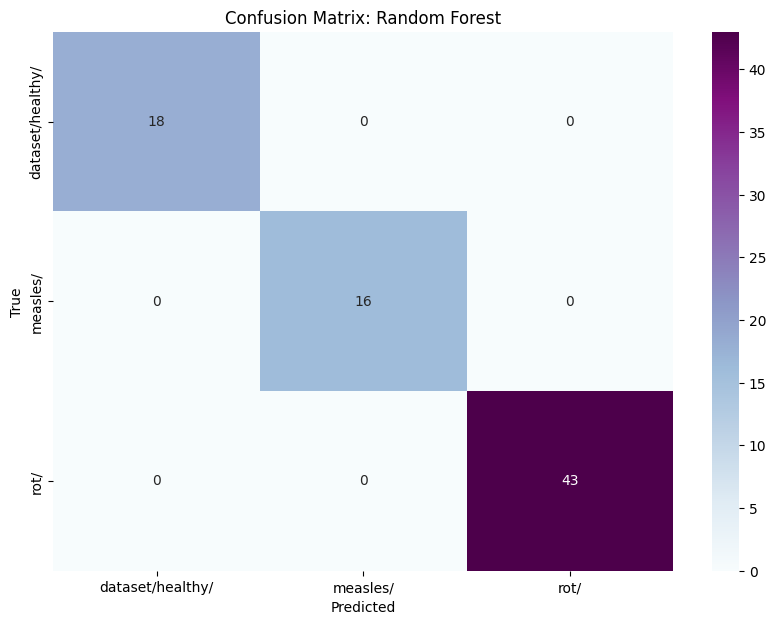

In [35]:
unique_labels = np.unique(y)

evaluate_model(y_test, y_pred_knn, 'KNN', unique_labels)
evaluate_model(y_test, y_pred_svm, 'SVM', unique_labels)
evaluate_model(y_test, y_pred_rf, 'Random Forest', unique_labels)